In [50]:
# Imports
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import folium
import json
import re
from collections import Counter
from scipy import stats


In [51]:
# listings_filepath = '/Users/arneshsaha/Desktop/AirBnb/datasets/listings.csv'
# listings_df = pd.read_csv(listings_filepath)


In [52]:
listings_filepath = '/Users/abhayrakeshdeshmukhmaurya/Library/CloudStorage/OneDrive-UniversityofEdinburgh/CS/University/Year 2/Data Science/CW3/AirBnb/datasets/listings.csv'
listings_df = pd.read_csv(listings_filepath)


Data Cleaning

In [53]:
columns = ['host_url', 'host_name', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'calendar_updated', 'calendar_last_scraped', 'picture_url', 'neighbourhood_group_cleansed', 'license', 'host_location', 'first_review', 'last_review', 'host_thumbnail_url', 'host_picture_url', 'description', 'neighborhood_overview', 'host_since', 'host_about', 'host_neighbourhood', 'host_verifications', 'neighbourhood', 'reviews_per_month', 'bathrooms', 'bathrooms_text', 'neighbourhood_cleansed',  'host_response_time', 'property_type', 'id',
           'host_id', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
           'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'bedrooms', 'beds', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', "calculated_host_listings_count_shared_rooms"]
listings_df.drop(columns=columns, inplace=True)

# listings_df.dropna(subset=['bedrooms', 'review_scores_cleanliness',
#                    "beds"], inplace=True)

# Converting columns with (True, False) to (1, 0)
replace_dict = {'instant_bookable': {'t': 1, 'f': 0},
                'has_availability': {'t': 1, 'f': 0}
                }
listings_df = listings_df.replace(replace_dict)

# Creating parking column and assigning the rows with parking feature
parking_rows = listings_df[(listings_df['name'].str.contains('parking', case=False)) |
                           (listings_df['amenities'].apply(lambda x: 'parking' in x))]

listings_df['Parking'] = 0
listings_df.loc[parking_rows.index, 'Parking'] = 1

# Creating room_type_num column to store unique types in room_type
room_type_labels, room_type_unique = pd.factorize(listings_df['room_type'])
listings_df['room_type_num'] = room_type_labels

# Removing dollar sign from price
listings_df['price'] = listings_df['price'].str.replace(
    ',', '', regex=True).str.replace('$', '', regex=True).astype('float')

# drop further columns
columns = ['name', 'amenities', 'room_type_num']
listings_df.drop(columns=columns, inplace=True)

# Droping NaN
listings_df.dropna(axis=0, inplace=True)

# Resetting index to have sequential index

listings_df = listings_df.reset_index().sort_values(by='index')
listings_df = listings_df.drop(columns=['index'])
listings_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6711 entries, 0 to 6710
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   latitude                     6711 non-null   float64
 1   longitude                    6711 non-null   float64
 2   room_type                    6711 non-null   object 
 3   accommodates                 6711 non-null   int64  
 4   price                        6711 non-null   float64
 5   minimum_nights               6711 non-null   int64  
 6   maximum_nights               6711 non-null   int64  
 7   minimum_minimum_nights       6711 non-null   int64  
 8   maximum_minimum_nights       6711 non-null   int64  
 9   minimum_maximum_nights       6711 non-null   int64  
 10  maximum_maximum_nights       6711 non-null   int64  
 11  minimum_nights_avg_ntm       6711 non-null   float64
 12  maximum_nights_avg_ntm       6711 non-null   float64
 13  has_availability  

In [54]:
# listings_df = listings_df[listings_df['price'] < 200]

In [55]:
print("Original Shape:", listings_df.shape)
z_scores = np.abs(stats.zscore(listings_df['price']))

# Define a threshold for outlier removal (e.g., Z-score > 3)
threshold = 0.8

# Filter the dataframe to remove outliers
listings_df = listings_df[z_scores < threshold]

# Print the shape of the filtered dataframe

print("Filtered Shape:",   listings_df.shape)

Original Shape: (6711, 30)
Filtered Shape: (6617, 30)


Filtered Shape: (6617, 30)


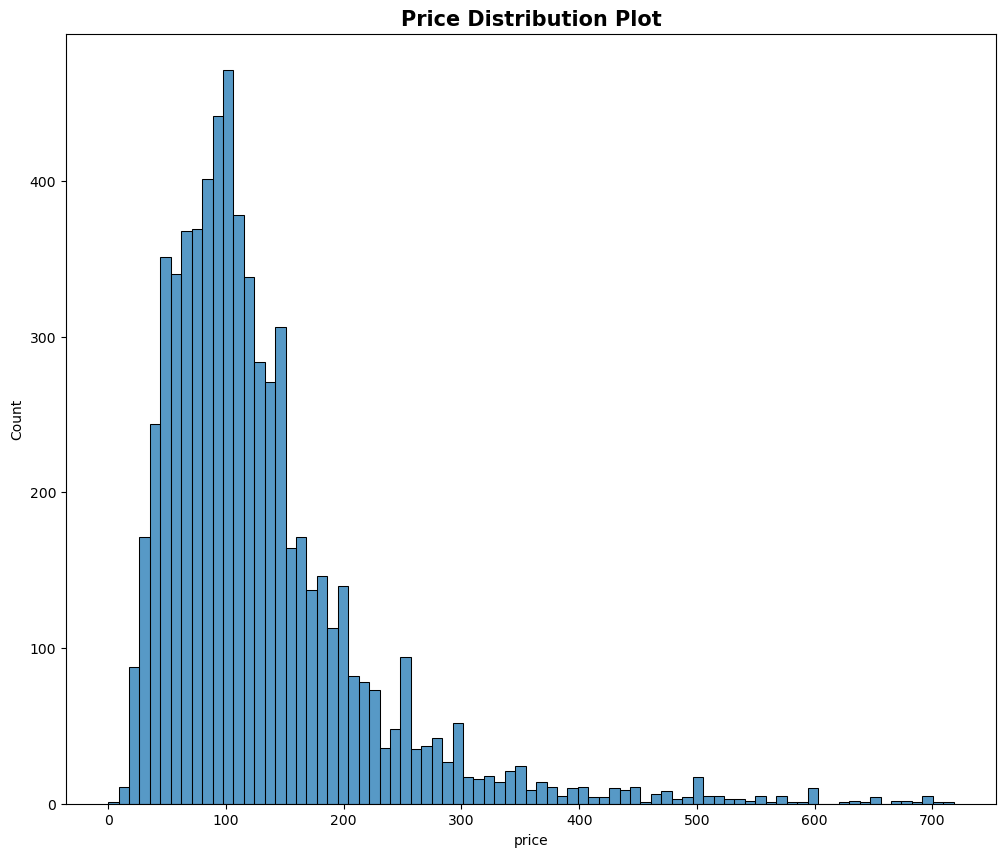

In [56]:
plt.figure(figsize=(12,10))
sns.histplot(listings_df['price'])
plt.title("Price Distribution Plot",size=15, weight='bold')
print("Filtered Shape:",   listings_df.shape)

